### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
application_df["NAME"].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [4]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [5]:
application_df = application_df[application_df["STATUS"]==1]
application_df["STATUS"].value_counts()

1    34294
Name: STATUS, dtype: int64

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "STATUS", "APPLICATION_TYPE"], 1) 

C:\Users\chernandez\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# Determine the number of unique values in each column.
print(application_df.shape)
application_df.nunique()

(34294, 9)


NAME                      19565
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

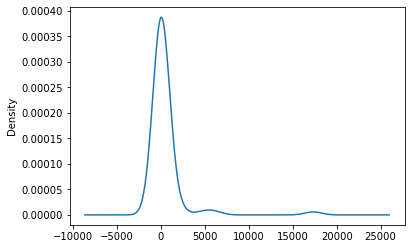

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1882
Name: CLASSIFICATION, dtype: int64

In [11]:
print(application_df.shape)
application_df.nunique()

(34294, 9)


NAME                      19565
AFFILIATION                   6
CLASSIFICATION                6
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
name_count = application_df['NAME'].value_counts()
len(name_count)
name_count

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
CHRISTIAN DEAF FELLOWSHIP                             1
ST LOUIS SLAM WOMENS FOOTBALL                         1
AIESEC ALUMNI IBEROAMERICA CORP                       1
WEALLBLEEDRED ORG INC                                 1
WATERHOUSE CHARITABLE TR                              1
Name: NAME, Length: 19565, dtype: int64

<AxesSubplot:ylabel='Density'>

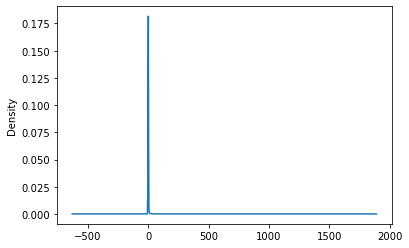

In [13]:
# Visualize the value counts of CLASSIFICATION
name_count.plot.density()

In [14]:
# Determine which values to replace if counts are less than ..?
replace_name = list(name_count[name_count<200].index)

# Replace in dataframe
for cls in replace_name:
    application_df.NAME = application_df.NAME.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()
application_df.NAME.nunique()

15

In [15]:
# Look at CLASSIFICATION value counts for binning
ask_count = application_df['ASK_AMT'].value_counts()
len(ask_count)
ask_count

5000        25394
63981           3
15583           3
6725            3
10478           3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

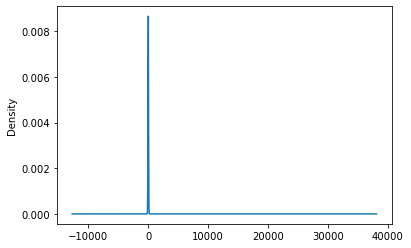

In [16]:
# Visualize the value counts of CLASSIFICATION
ask_count.plot.density()

In [17]:
# Determine which values to replace if counts are less than ..?
replace_ask = list(ask_count[ask_count<500].index)

# Replace in dataframe
for cls in replace_ask:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()
application_df.ASK_AMT.nunique()

2

In [18]:
application_df

,NAME,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,N,5000,1
1,Other,Independent,C2000,Preservation,Co-operative,1-9999,N,Other,1
2,Other,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,Other,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,Other,1
4,Other,Independent,C1000,Heathcare,Trust,100000-499999,N,Other,1
...,...,...,...,...,...,...,...,...,...
34294,Other,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,Other,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,Other,Independent,C3000,ProductDev,Association,0,N,5000,1


In [19]:
# Generate our categorical variable lists 
# application_cat = application_df.dtypes[application_df.dtypes=="object"].index.tolist()
# application_cat

In [20]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(application_df))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(application_cat)
y= application_df['IS_SUCCESSFUL']
X= application_df.drop(columns= 'IS_SUCCESSFUL')
X= pd.get_dummies(X)
X.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [21]:
# Merge one-hot encoded features and drop the originals
# application_df = application_df.merge(encode_df, left_index=True,right_index=True).drop(application_cat, 1)
# application_df.head()

In [22]:
# Split our preprocessed data into our features and target arrays
# y = application_df['IS_SUCCESSFUL'].values
# X = application_df.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [41]:
X_train_scaled[0]
# print(X_train.shape)

array([-0.09725621, -0.10585383, -0.0889718 , -0.07581722, -0.0891935 ,
       -0.07811742, -0.09029411,  0.4676201 , -0.19217057, -0.1047213 ,
       -0.1000687 , -0.09309676, -0.15335789, -0.14616589, -0.12130847,
        1.09055436, -0.04139641, -1.08340484, -0.03241712, -0.01080066,
       -0.01972191,  0.98395453, -0.40621837, -0.46446826, -0.2368319 ,
       -0.2415556 , -0.262752  , -0.10566588, -0.06613345, -0.01080066,
        0.47033453, -0.44554332, -0.65368417, -0.12213087, -0.03473819,
        0.67856529, -1.56792339, -0.14713416, -0.12584875,  3.02953408,
       -0.08395099, -0.16982683, -0.35021974, -0.06371784, -0.07633422,
        0.02646384, -0.02646384, -1.68674801,  1.68674801])

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features =len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                4000      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,461
Trainable params: 6,461
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')


In [46]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
788/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7212
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7220
Epoch 2/100
799/804 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7336
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5266 - accuracy: 0.7334
Epoch 3/100
803/804 [============================>.] - ETA: 0s - loss: 0.5230 - accuracy: 0.7349
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5230 - accuracy: 0.7350
Epoch 4/100
787/804 [============================>.] - ETA: 0s - loss: 0.5224 - accuracy: 0.7377
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5218 - accuracy: 0.7377
Epoch 5/100
799/804 [=======================

800/804 [============================>.] - ETA: 0s - loss: 0.5112 - accuracy: 0.7435
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5113 - accuracy: 0.7434
Epoch 36/100
786/804 [============================>.] - ETA: 0s - loss: 0.5113 - accuracy: 0.7448
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5112 - accuracy: 0.7443
Epoch 37/100
804/804 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.7458
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5107 - accuracy: 0.7458
Epoch 38/100
788/804 [============================>.] - ETA: 0s - loss: 0.5106 - accuracy: 0.7430
Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5112 - accuracy: 0.7426
Epoch 39/100
798/804 [===========================

792/804 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.7445
Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5079 - accuracy: 0.7446
Epoch 70/100
796/804 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.7455
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5082 - accuracy: 0.7453
Epoch 71/100
799/804 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.7460
Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5077 - accuracy: 0.7458
Epoch 72/100
782/804 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.7470
Epoch 72: saving model to checkpoints\weights.72.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5078 - accuracy: 0.7467
Epoch 73/100
800/804 [===========================

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5327 - accuracy: 0.7337 - 416ms/epoch - 2ms/step
Loss: 0.5326544046401978, Accuracy: 0.733729898929596


In [48]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")